In [97]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


current_date = datetime(2023, 3, 3)
expire_date = datetime(2023, 4, 21)
r = 0.0425
q = 0.0053

def gbsm(option_type, S, X, T, sigma, r, q):
    d1 = (np.log(S/X) + (r - q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == 'Call':
        price = S*np.exp(-q*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)
    else:
        price = X*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)
    return price
   


def implied_vol(option_type, S, X, T, r, q, market_price, x0=0.5):
    def equation(sigma):
        return gbsm(option_type, S, X, T, sigma, r, q) - market_price
    
    return scipy.optimize.fsolve(equation, x0=x0, xtol=0.00001)[0]

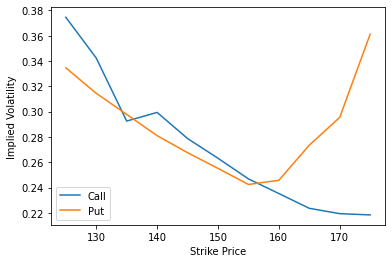

In [98]:
options = pd.read_csv("AAPL_Options.csv")

S = 151.03

implied_vols_call = []
implied_vols_put = []
strike_prices_call = []
strike_prices_put = []


for i in range(len(options)):
  option_type = options["Type"][i]
  X = options["Strike"][i]
  T = (expire_date - current_date).days / 365
  market_price = options["Last Price"][i]
  sigma = implied_vol(option_type, S, X, T, r, q, market_price)

  if option_type == "Call":
    implied_vols_call.append(sigma)
    strike_prices_call.append(X)
  else:
    implied_vols_put.append(sigma)
    strike_prices_put.append(X)

# Plot the result
plt.figure()
plt.plot(strike_prices_call, implied_vols_call, label="Call")
plt.plot(strike_prices_put, implied_vols_put, label="Put")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.show()